#  User Story 15 - Statistical Analysis of Average Annual Profit

##  Introduction

In railway station management, assessing the **annual profit trends** is crucial for strategic decision-making. This analysis aims to calculate statistical measures of the **average annual profit** for a user-specified railway station. By understanding key metrics such as **mean, median, mode, standard deviation, and outliers**, railway managers can make informed decisions regarding operational efficiency and financial planning.

---

##  Objectives

1. **Data Loading and Preparation:**
   - Load data from the `Stations_Data.csv` file.
   - Filter the data based on the specified railway station.

2. **Profit Calculation:**
   - Calculate the **annual profit** as the difference between **revenues and expenses**.

3. **Descriptive Statistics Calculation:**
   - Compute **mean, median, mode, and standard deviation** of the annual profit.

4. **Outlier Detection:**
   - Identify **unusual profit values** using the **Interquartile Range (IQR)** method.

5. **Identification of Extreme Years:**
   - Determine the **most and least profitable years**.

6. **Visualization:**
   - Plot a **boxplot** to visualize the profit distribution and detect outliers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" Loading data from 'Stations_Data.csv'...")
try:
    df = pd.read_csv("Stations_Data.csv", delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    print(" Data loaded successfully!")
except FileNotFoundError:
    print(" Error: File 'Stations_Data.csv' not found.")
    exit()

 Loading data from 'Stations_Data.csv'...
 Data loaded successfully!


##  Profit Calculation Formula

The profit for each year is calculated as:

$$
\text{Profit} = \text{Revenues} - \text{Expenses}
$$

This formula allows us to understand the net financial gain or loss for each year at the selected railway station.


In [5]:
station_name = input("Enter the station name: ").strip()

station_df = df[df['Station'] == station_name].copy()

if station_df.empty:
    print(f"No data found for station '{station_name}'. Please check the name and try again.")
else:
    print(f"{len(station_df)} records found for {station_name}.")

station_df['Revenues'] = station_df['Revenues'].astype(float)
station_df['Expenses'] = station_df['Expenses'].astype(float)
station_df['Profit'] = station_df['Revenues'] - station_df['Expenses']

station_df[['Year', 'Month', 'Revenues', 'Expenses', 'Profit']].head()

Enter the station name:  Stuttgart


120 records found for Stuttgart.


,Year,Month,Revenues,Expenses,Profit
0,2015,1,446.19,676.71,-230.52
5,2015,2,338.93,478.83,-139.90
10,2015,3,245.18,490.19,-245.01
15,2015,4,348.81,673.16,-324.35
20,2015,5,506.01,225.41,280.60


##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the central tendency of the annual profit:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Standard Deviation

Standard deviation measures how spread out the profit values are from the mean:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### 3. Median

The median is the middle value when the profits are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

### 4. Mode

The mode is the most frequently occurring profit value:

$$
\text{Mode} = \text{argmax}_x \; f(x)
$$

Where \( f(x) \) is the frequency of value \( x \).


In [9]:
# Calculate Annual Average Profit
annual_profit = station_df.groupby('Year')['Profit'].mean().reset_index()
annual_profit.rename(columns={'Profit': 'Average_Profit'}, inplace=True)

In [8]:
# Descriptive Statistics for Annual Profit
mean_profit = annual_profit['Average_Profit'].mean()
std_profit = annual_profit['Average_Profit'].std()
median_profit = annual_profit['Average_Profit'].median()

print("\n=== Annual Profit Statistics ===")
print(f"Mean Annual Profit: {mean_profit:.2f}")
print(f"Standard Deviation of Annual Profit: {std_profit:.2f}")
print(f"Median Annual Profit: {median_profit:.2f}")


=== Annual Profit Statistics ===
Mean Annual Profit: 118.55
Standard Deviation of Annual Profit: 192.95
Median Annual Profit: 43.67


##  Outlier Detection Formula (IQR Method)

To identify unusual profit values, calculate the **Interquartile Range (IQR)**:

$$
IQR = Q_3 - Q_1
$$

Define the outlier boundaries as follows:

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR
$$

$$
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

Any value outside this range is considered an **outlier**, indicating exceptional financial performance or irregular data.


In [10]:
# Outlier Detection using IQR
Q1 = annual_profit['Average_Profit'].quantile(0.25)
Q3 = annual_profit['Average_Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier years
outliers = annual_profit[(annual_profit['Average_Profit'] < lower_bound) | (annual_profit['Average_Profit'] > upper_bound)]

print("\n=== Outlier Profits ===")
if not outliers.empty:
    print(f"Outlier Years (Average Profit outside [{lower_bound:.2f}, {upper_bound:.2f}]):")
    display(outliers)
else:
    print("No outlier profits detected.")


=== Outlier Profits ===
Outlier Years (Average Profit outside [-137.32, 272.92]):


,Year,Average_Profit
8,2023,619.418333


##  Most and Least Profitable Years Formulas

### Most Profitable Year:

$$
\text{Max Profit} = \max(x_1, x_2, \dots, x_n)
$$

### Least Profitable Year:

$$
\text{Min Profit} = \min(x_1, x_2, \dots, x_n)
$$

These formulas identify the years with the **highest and lowest profitability**, which are critical for evaluating station performance.


In [12]:
#  Most and Least Profitable Years
most_profitable = annual_profit.loc[annual_profit['Average_Profit'].idxmax()]
least_profitable = annual_profit.loc[annual_profit['Average_Profit'].idxmin()]

print("\n Most Profitable Year:")
print(f"Year: {int(most_profitable['Year'])}, Average Profit: {most_profitable['Average_Profit']:.2f}")

print("\n Least Profitable Year:")
print(f"Year: {int(least_profitable['Year'])}, Average Profit: {least_profitable['Average_Profit']:.2f}")


 Most Profitable Year:
Year: 2023, Average Profit: 619.42

 Least Profitable Year:
Year: 2015, Average Profit: -25.66


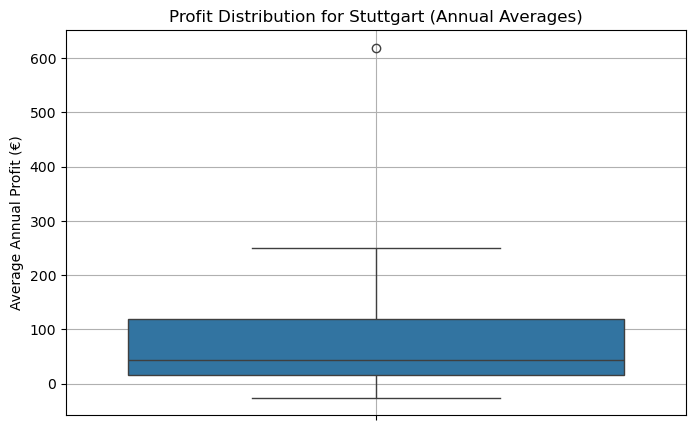

In [13]:
#  Profit Distribution Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=annual_profit['Average_Profit'])
plt.title(f"Profit Distribution for {station_name} (Annual Averages)")
plt.ylabel("Average Annual Profit (€)")
plt.grid(True)
plt.show()

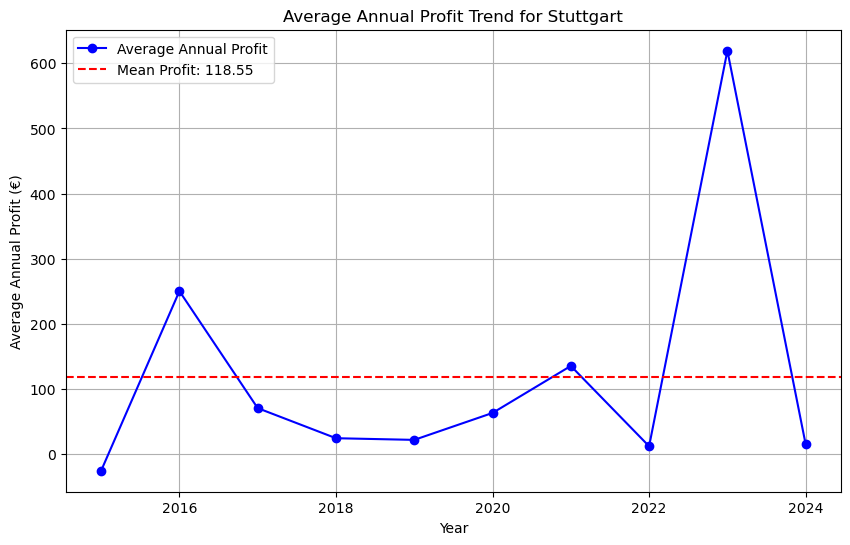

In [14]:
#  Annual Profit Line Plot
plt.figure(figsize=(10, 6))
plt.plot(annual_profit['Year'], annual_profit['Average_Profit'], marker='o', linestyle='-', color='blue', label='Average Annual Profit')
plt.axhline(y=mean_profit, color='red', linestyle='--', label=f'Mean Profit: {mean_profit:.2f}')
plt.title(f"Average Annual Profit Trend for {station_name}")
plt.xlabel("Year")
plt.ylabel("Average Annual Profit (€)")
plt.legend()
plt.grid(True)
plt.show()

##  Interpretation of Results

The analysis provides insights into the **profitability trends** of the selected railway station:

- The **mean and median** indicate the **central tendency** of annual profits.
- The **standard deviation** shows how much the profits vary from year to year.
- **Outliers** highlight years with **unusually high or low** profitability.
- Identifying the **most and least profitable years** helps pinpoint **exceptional financial performances**.

These metrics enable railway management to make **data-driven decisions** regarding **investment, resource allocation, and operational improvements**.
